In [1]:
import pandas as pd
df=pd.read_csv('18/tmp', sep='\t') #model_name_eval_all.tsv', sep='\t')

pd.options.mode.copy_on_write = True
df['SCORE'] = pd.to_numeric(df['SCORE'], errors='raise')

stats_df = pd.DataFrame(columns=['CELL_LINE_NAME', 'RUN1_TOTAL_CORRECT', 'RUN1_TOTAL', 'RUN1_PERC_CORRECT'])

In [2]:
# This tells us how well a model does per cell line

In [3]:
# unique list of cell line names
names = df['CELL_LINE_NAME'].unique()
for cell_line in names:
    filtered_df = df[df['CELL_LINE_NAME'] == cell_line]
    try:
        filtered_df['SCORE'] = pd.to_numeric(filtered_df['SCORE'], errors='raise')
    except Exception as e:
        print(f'{e} {filtered_df["SCORE"]}')
    
    total = filtered_df['SCORE'].count()
    correct = filtered_df['SCORE'].sum()

    stats_df.loc[len(stats_df)] = [cell_line, correct, total, correct/total]



In [4]:
stats_df.to_csv('model_name_eval_all_stats.tsv', sep='\t')

In [6]:
import matplotlib.pyplot as plt

In [21]:
# Corrected filtering expression
filtered_stats_df = stats_df[(stats_df['RUN1_PERC_CORRECT'] < 0.25) & (stats_df['CELL_LINE_NAME'].str.contains("ABM"))]


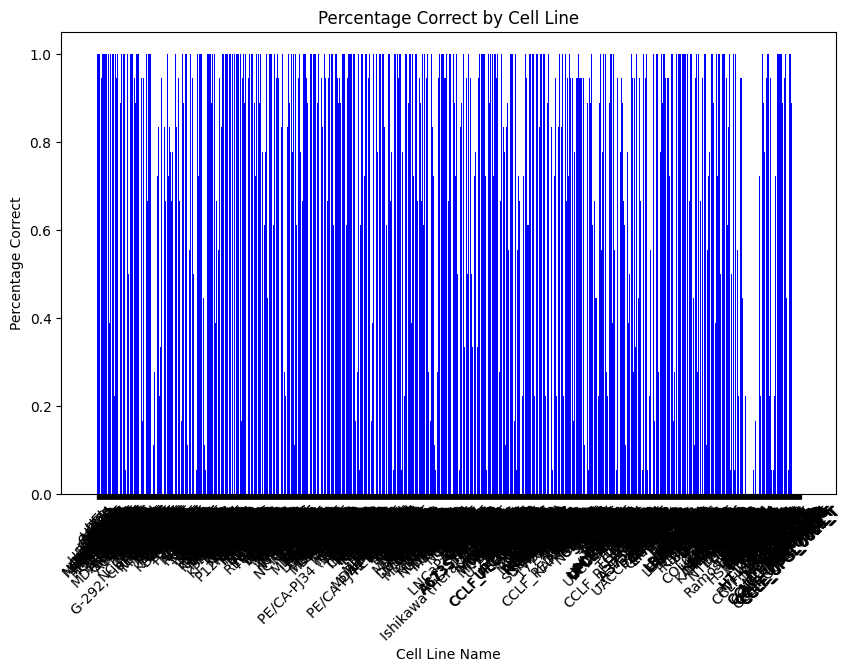

In [23]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.bar(stats_df['CELL_LINE_NAME'], stats_df['RUN1_PERC_CORRECT'], color='blue')  # Create a bar chart
plt.xlabel('Cell Line Name')  # Label for x-axis
plt.ylabel('Percentage Correct')  # Label for y-axis
plt.title('Percentage Correct by Cell Line')  # Title of the chart
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot